In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="CcDqpFkghF2iME7I4UYr")
project = rf.workspace("projects-t3edn").project("head-detection_m")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.23, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to head-detection_m-5 in yolov8:: 100%|██████████| 1482/1482 [00:00<00:00, 13442.99it/s]


In [3]:
!pip install opencv-python

In [8]:
import cv2

image = cv2.imread("/home/utilisateur/Documents/faceLinker/Data/test_data/ola.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.imshow("image", image)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

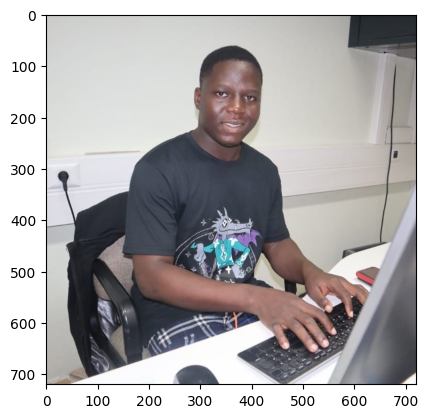

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [10]:
image.shape

(720, 720, 3)

In [11]:
from utils import retrieve_image_paths, display_annotated_images, read_images_and_annotations
import os

_path = "head-detection_m-5"
directories = []
files = []

for item in os.listdir(_path):
    if os.path.isdir(os.path.join(_path, item)):
        directories.append(os.path.join(_path, item))
    elif os.path.isfile(os.path.join(_path, item)):
        files.append(os.path.join(_path, item))

directories, files

(['head-detection_m-5/valid',
  'head-detection_m-5/train',
  'head-detection_m-5/test'],
 ['head-detection_m-5/README.dataset.txt',
  'head-detection_m-5/README.roboflow.txt',
  'head-detection_m-5/data.yaml'])

In [12]:
train_image_label_pairs = retrieve_image_paths(directories[0])
f"Train_sets : {len(train_image_label_pairs)}"

'Train_sets : 62'

In [13]:
train_image_label_pairs[:5]

[('head-detection_m-5/valid/images/WhatsApp-Video-2024-05-06-at-18_35_36_mp4-0034_jpg.rf.a9b522752730adf1cf7abce05fbe9f6d.jpg',
  'head-detection_m-5/valid/labels/WhatsApp-Video-2024-05-06-at-18_35_36_mp4-0034_jpg.rf.a9b522752730adf1cf7abce05fbe9f6d.txt'),
 ('head-detection_m-5/valid/images/4819600-hd_720_1366_25fps-mp4_frame_66_jpg.rf.d5cadefba6707612ad4d1ce5021879e2.jpg',
  'head-detection_m-5/valid/labels/4819600-hd_720_1366_25fps-mp4_frame_66_jpg.rf.d5cadefba6707612ad4d1ce5021879e2.txt'),
 ('head-detection_m-5/valid/images/7263099-sd_640_360_25fps-mp4_frame_23_jpg.rf.50e15698f1f03818a7727e787cf44133.jpg',
  'head-detection_m-5/valid/labels/7263099-sd_640_360_25fps-mp4_frame_23_jpg.rf.50e15698f1f03818a7727e787cf44133.txt'),
 ('head-detection_m-5/valid/images/WhatsApp-Video-2024-05-06-at-18-35-36-mp4_frame_8_jpg.rf.f0c644e4a720399e949d239e630d2a94.jpg',
  'head-detection_m-5/valid/labels/WhatsApp-Video-2024-05-06-at-18-35-36-mp4_frame_8_jpg.rf.f0c644e4a720399e949d239e630d2a94.txt'),


In [14]:
import random
images = []
annotations = []
selected_pairs = random.sample(train_image_label_pairs, min(5, len(train_image_label_pairs)))
for elt in selected_pairs:
    image, annotation = read_images_and_annotations(elt[0], elt[1])
    images.append(image)
    annotations.append(annotation)
annotations

[[{'class_id': 0,
   'x_center': 0.3546875,
   'y_center': 0.425,
   'width': 0.0296875,
   'height': 0.0390625}],
 [{'class_id': 0,
   'x_center': 0.59375,
   'y_center': 0.415625,
   'width': 0.0890625,
   'height': 0.0953125},
  {'class_id': 0,
   'x_center': 0.2390625,
   'y_center': 0.3625,
   'width': 0.0875,
   'height': 0.1046875}],
 [{'class_id': 0,
   'x_center': 0.4375,
   'y_center': 0.5046875,
   'width': 0.0765625,
   'height': 0.10625}],
 [{'class_id': 0,
   'x_center': 0.490625,
   'y_center': 0.4484375,
   'width': 0.0609375,
   'height': 0.0828125}],
 []]

In [16]:
images

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

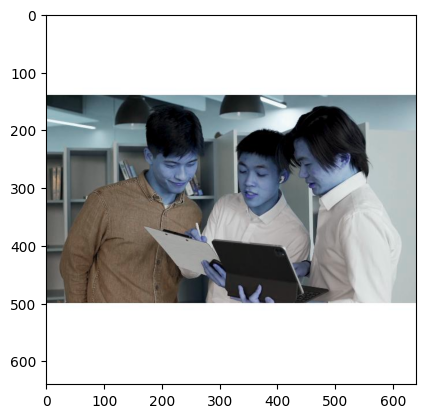

In [17]:
image = cv2.imread('head-detection_m-5/train/images/7989754-hd_1920_1080_25fps-mp4_frame_25_jpg.rf.104ec1eabe031718896a4a83c43fea7c.jpg')
plt.imshow(image)

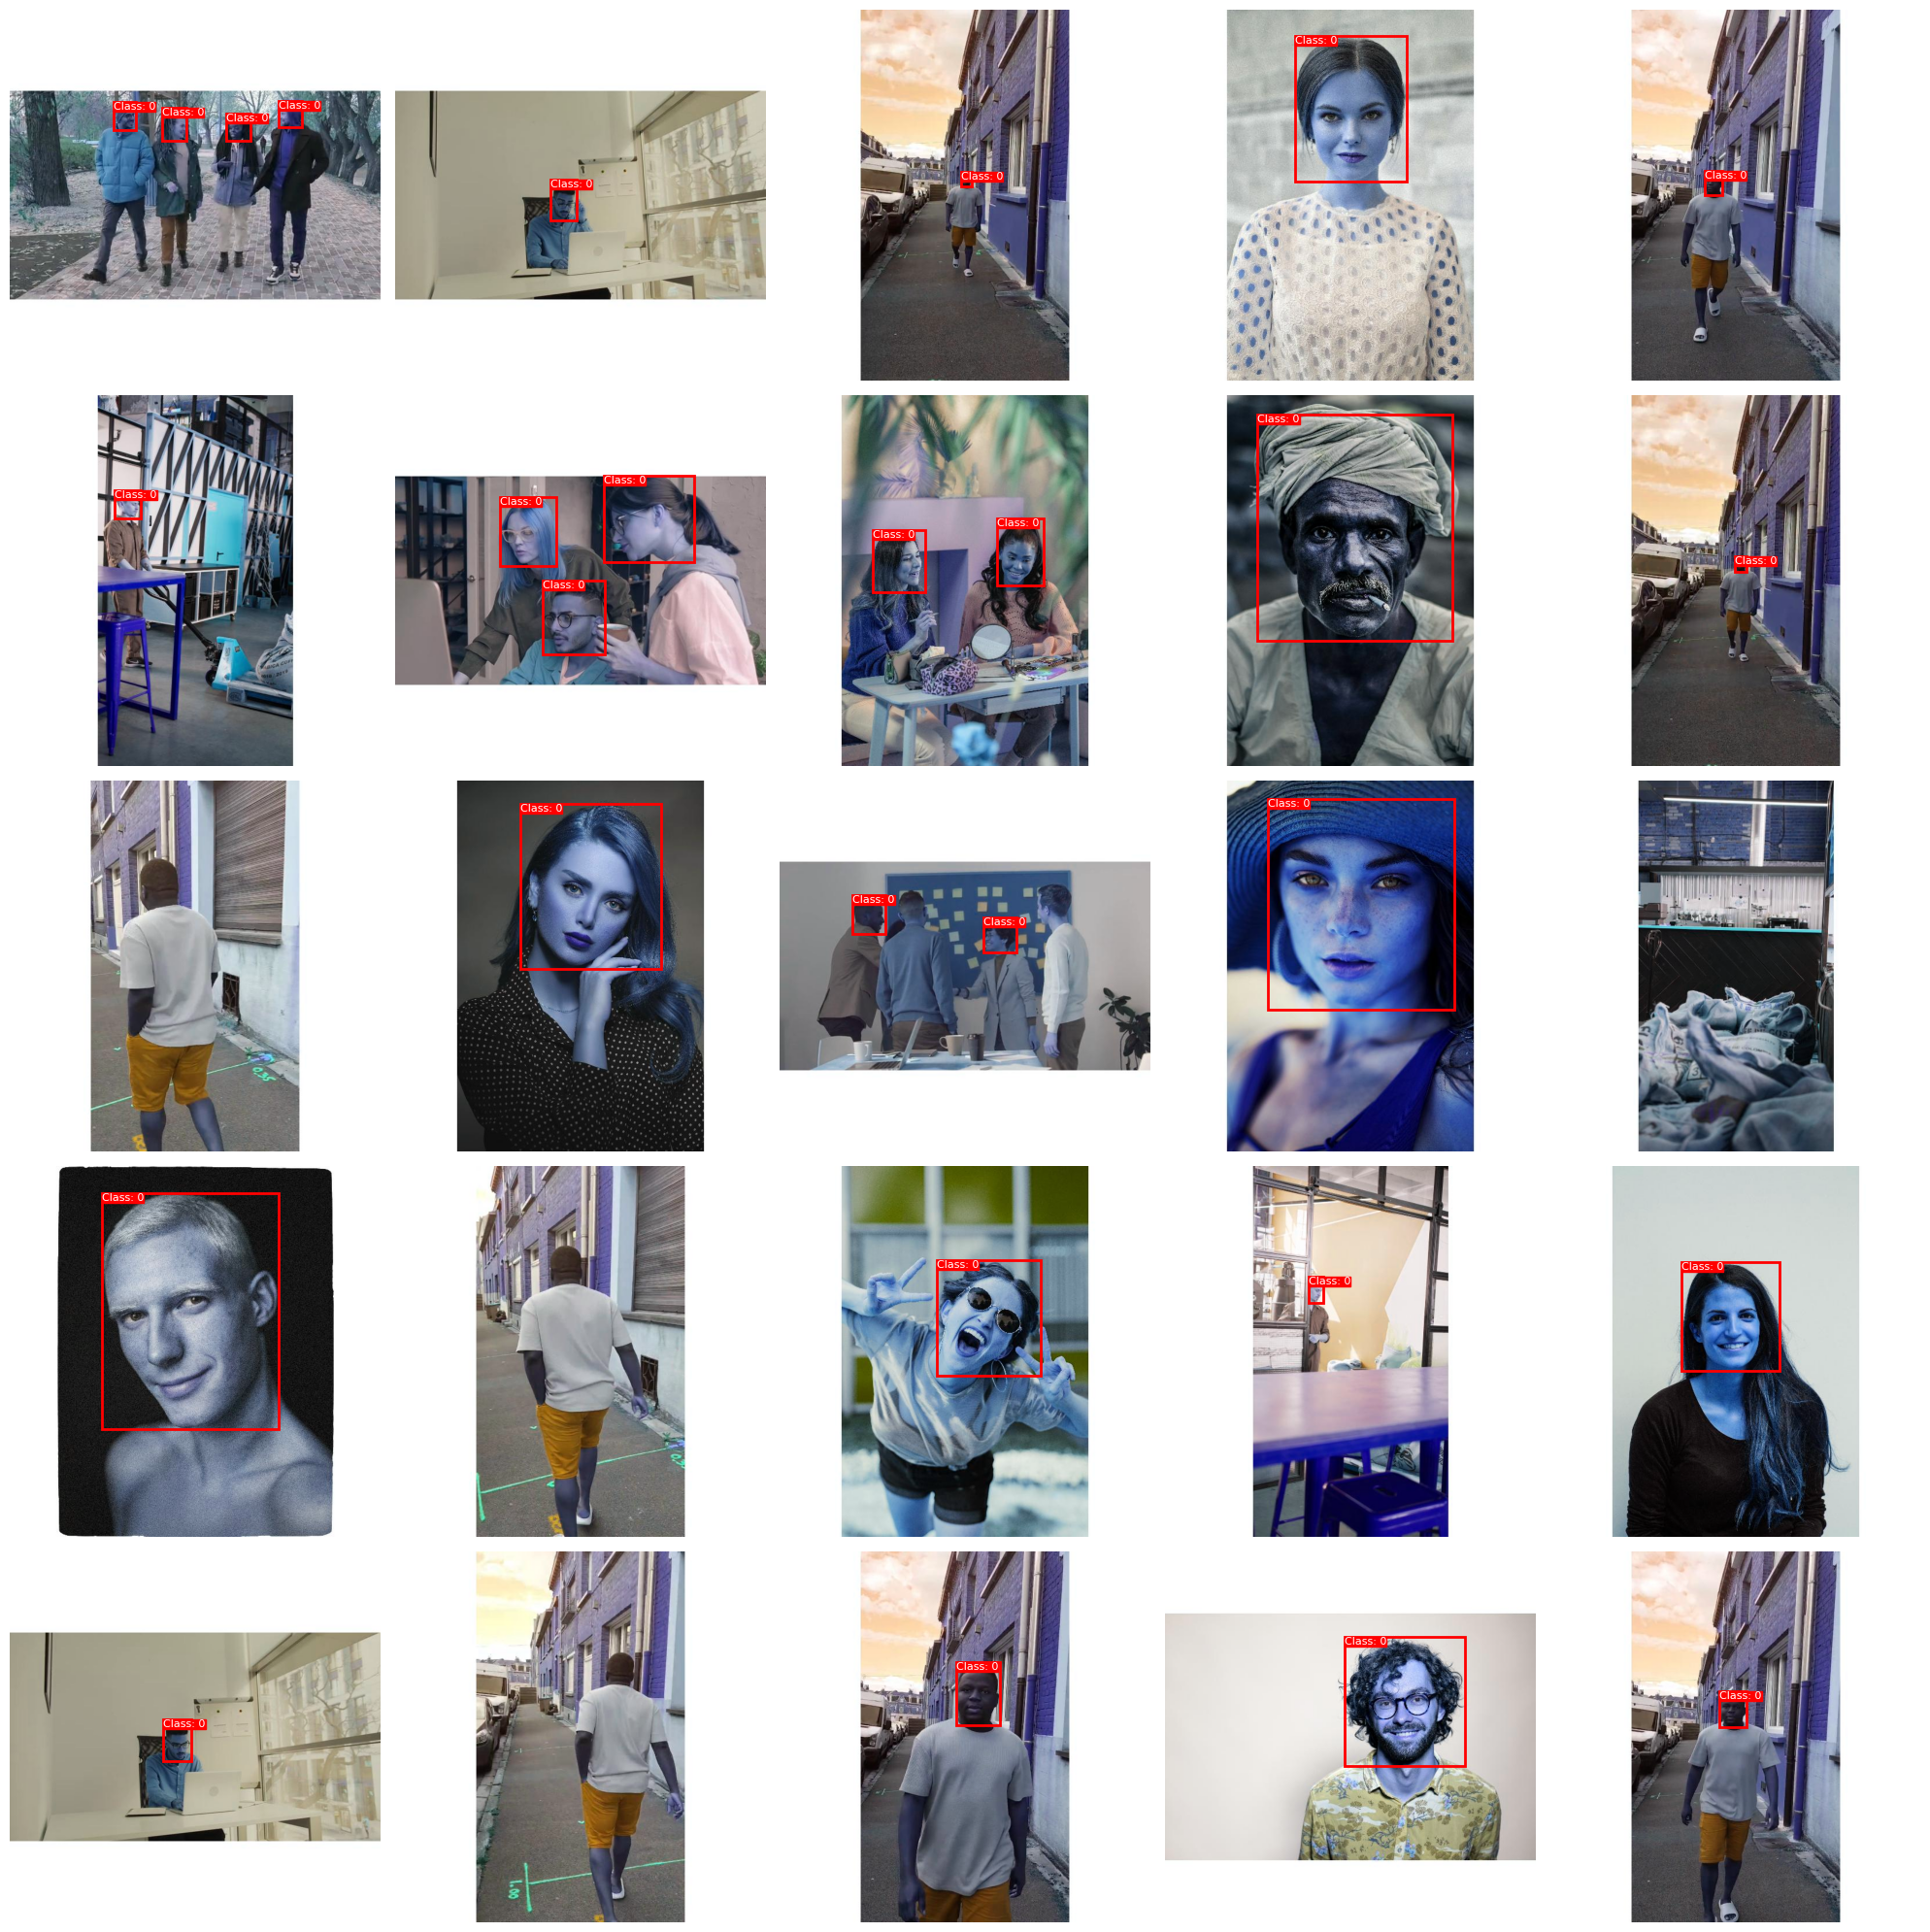

In [18]:
display_annotated_images(train_image_label_pairs)


0: 640x640 1 head, 23.9ms
Speed: 3.9ms preprocess, 23.9ms inference, 656.9ms postprocess per image at shape (1, 3, 640, 640)


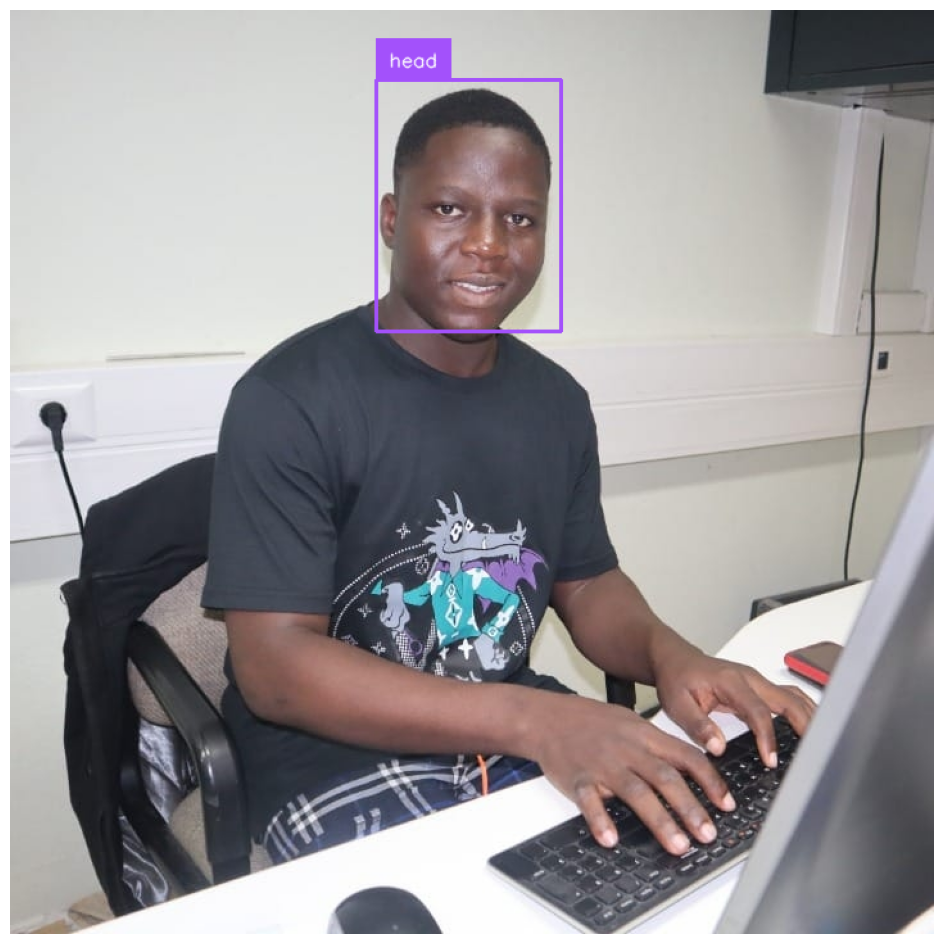

In [23]:
import os
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections, BoundingBoxAnnotator, LabelAnnotator, plot_image
from PIL import Image

# Create directory for saving the model if it doesn't exist
save_dir = "model_save"
os.makedirs(save_dir, exist_ok=True)

# Download model from huggingface hub
model_path = hf_hub_download(repo_id="konthee/YOLOv9-Head-Detection", filename="yolov9c_best.pt", cache_dir=save_dir)

# Load the YOLO model
model = YOLO(model_path)

# Load the image
image_path = "/home/utilisateur/Documents/faceLinker/Data/test_data/ola.jpg"
image = Image.open(image_path)

# Run the model on the image
output = model(image)

# Convert model output to Detections
results = Detections.from_ultralytics(output[0])

# Annotate the image with bounding boxes and labels
bounding_box_annotator = BoundingBoxAnnotator()
label_annotator = LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=results)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=results)

# Display annotated image
plot_image(annotated_image)



0: 448x640 8 heads, 94.6ms
Speed: 13.1ms preprocess, 94.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


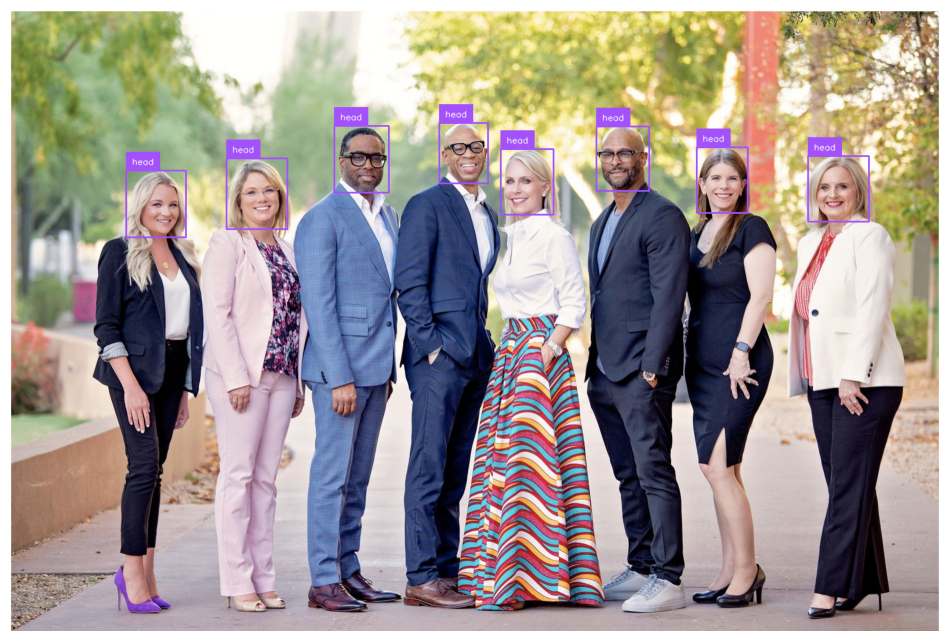

In [24]:
# Load the image
image_path = "/home/utilisateur/Documents/faceLinker/Data/test_data/all_about_people_cover.jpeg"
image = Image.open(image_path)

# Run the model on the image
output = model(image)

# Convert model output to Detections
results = Detections.from_ultralytics(output[0])

# Annotate the image with bounding boxes and labels
bounding_box_annotator = BoundingBoxAnnotator()
label_annotator = LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=results)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=results)

# Display annotated image
plot_image(annotated_image)